## Import Library

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error,mean_squared_error
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

## Membaca Data

In [2]:
beras = pd.read_csv('C:/Users/hangg/Downloads/Random Aslab/DSDA/Material/Supply_Beras.csv',index_col='Periode', parse_dates=True, sep = ';')
print(beras.shape)
print(beras.head())

(48, 1)
            Produksi
Periode             
2017-01-01    808181
2017-02-01    803341
2017-03-01    802040
2017-04-01    788637
2017-05-01    775817


<AxesSubplot:title={'center':'Produksi Beras'}, xlabel='Periode'>

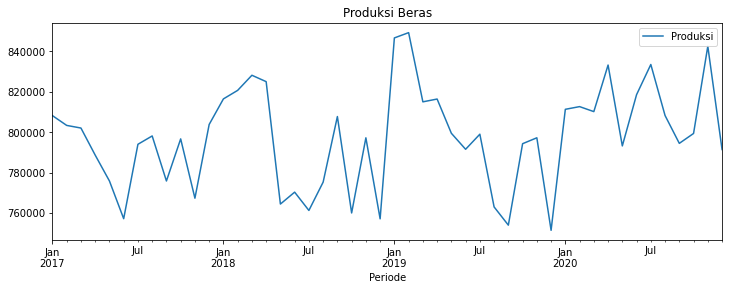

In [3]:
beras[['Produksi']].plot(title='Produksi Beras', figsize = (12,4))

### Melihat pola trend dan trend musiman

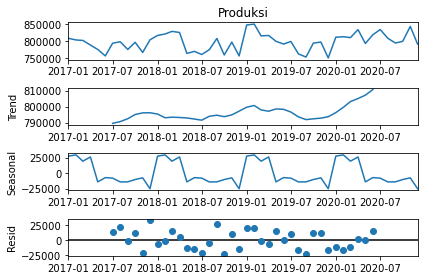

In [4]:
decompose_result = seasonal_decompose(beras['Produksi'],model='additive')
decompose_result.plot();

### Mengatur frekuensi datatime
Tujuannya untuk menetapkan parameter index time series sebelum diolah lebih lanjut

In [5]:
beras.index.freq = 'MS'
m = 12
alpha = 1/(2*m)

## Single Exponential Smoothing
Single Exponential Smoothing merupakan metode peramalan yang digunakan untuk data stasioner atau data yang relatif stabil.

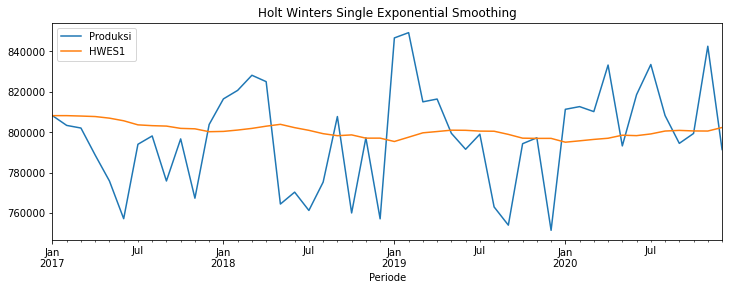

In [6]:
beras['HWES1'] = SimpleExpSmoothing(beras['Produksi']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
beras[['Produksi','HWES1']].plot(title='Holt Winters Single Exponential Smoothing', figsize=(12,4));

## Double Exponential Smoothing
Double Exponential Smoothing digunakan untuk data yang memiliki tren atau data yang memiliki kecenderungan peningkatan atau penurunan dalam jangka panjang.

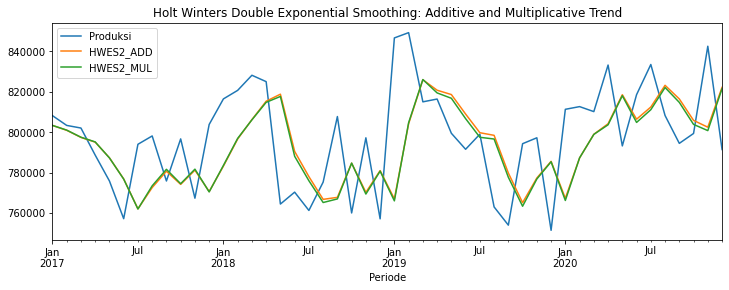

In [7]:
beras['HWES2_ADD'] = ExponentialSmoothing(beras['Produksi'],trend='add').fit().fittedvalues
beras['HWES2_MUL'] = ExponentialSmoothing(beras['Produksi'],trend='mul').fit().fittedvalues
beras[['Produksi','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend', figsize = (12,4));

## Triple Exponential Smoothing
Double Exponential Smoothing digunakan untuk data yang memiliki tren atau data yang memiliki kecenderungan peningkatan atau penurunan dalam jangka panjang dan dipengaruhi oleh musim.

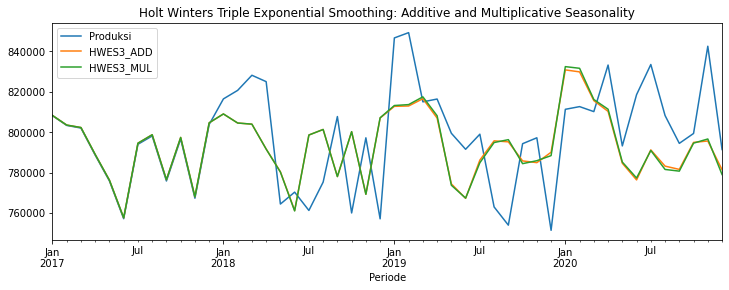

In [8]:
beras['HWES3_ADD'] = ExponentialSmoothing(beras['Produksi'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
beras['HWES3_MUL'] = ExponentialSmoothing(beras['Produksi'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
beras[['Produksi','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality', figsize = (12,4));

## Prediksi Data

In [9]:
f_prod= pd.read_csv('C:/Users/hangg/Downloads/Random Aslab/DSDA/Material/Supply_Beras.csv',index_col='Periode', parse_dates=True, sep = ';')

### Mengatur frekuensi datatime

In [10]:
f_prod.index.freq='MS'

### Mengetahui dimensi prediksi data

In [11]:
f_prod.shape

(48, 1)

## Memisah Data dan Implementasi Triple Exponential Smoothing
Kenapa menggunakan Triple Exponential Smoothing? Karena data produksi beras dipengaruhi oleh musim

In [12]:
train_prod = f_prod[:40]
test_prod = f_prod[40:]

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

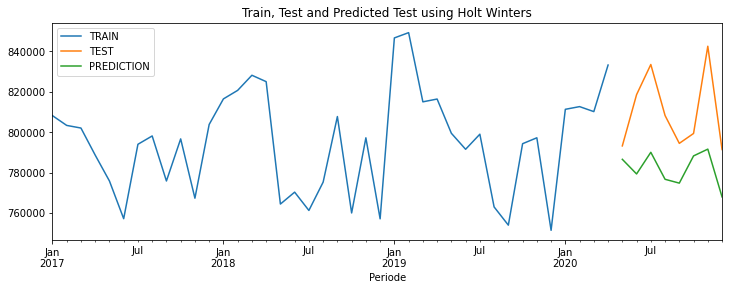

In [13]:
fitted_model = ExponentialSmoothing(train_prod['Produksi'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(len(test_prod))
train_prod['Produksi'].plot(legend=True,label='TRAIN')
test_prod['Produksi'].plot(legend=True,label='TEST',figsize=(12,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

### Visualisasi hasil prediksi

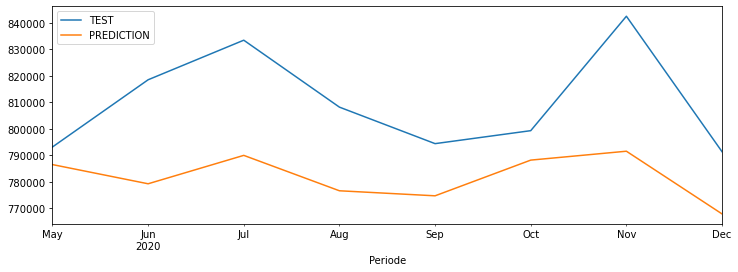

In [14]:
test_prod['Produksi'].plot(legend=True,label='TEST',figsize=(12,4))
test_predictions.plot(legend=True,label='PREDICTION');

In [15]:
print(f'Mean Absolute Error = {mean_absolute_error(test_prod,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_prod,test_predictions)}')

Mean Absolute Error = 28278.732970180994
Mean Squared Error = 1016794323.9722463


In [16]:
f_prod.tail()

,Produksi
Periode,
2020-08-01,808237
2020-09-01,794454
2020-10-01,799353
2020-11-01,842555
2020-12-01,791401


## Prediksi dalam beberapa waktu ke depan
Kenapa dipilih mulai prediksi pada bulan Januari 2021? Karena data terakhir berada pada bulan Desember 2020
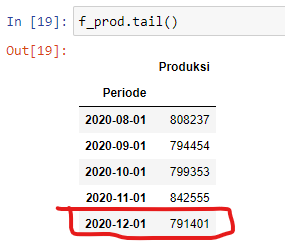

In [17]:
prediksi = fitted_model.predict(start=datetime(2021,1,1), end = datetime(2021,5,1))

## Mencetak hasil prediksi dan memvisualisasikan hasilnya

In [18]:
print(prediksi)

2021-01-01    822535.065885
2021-02-01    823778.754679
2021-03-01    814731.265145
2021-04-01    814585.724723
2021-05-01    787600.489025
Freq: MS, dtype: float64


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

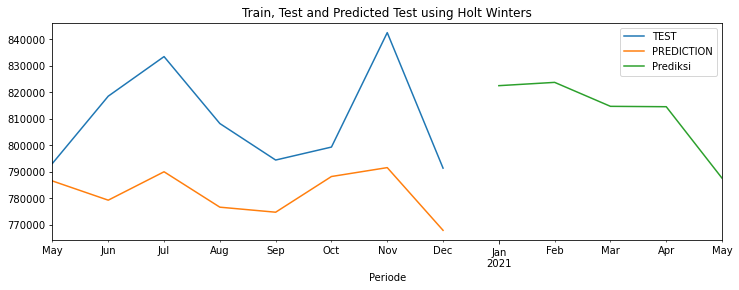

In [19]:
test_prod['Produksi'].plot(legend=True,label='TEST',figsize=(12,4))
test_predictions.plot(legend=True,label='PREDICTION');
prediksi.plot(legend=True, label='Prediksi')
plt.title('Train, Test and Predicted Test using Holt Winters')